# United States - Crime Rates - 1960 - 2014

### Introduction:

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [160]:
crime = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv",sep=',')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [21]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Year                55 non-null     int64
 1   Population          55 non-null     int64
 2   Total               55 non-null     int64
 3   Violent             55 non-null     int64
 4   Property            55 non-null     int64
 5   Murder              55 non-null     int64
 6   Forcible_Rape       55 non-null     int64
 7   Robbery             55 non-null     int64
 8   Aggravated_assault  55 non-null     int64
 9   Burglary            55 non-null     int64
 10  Larceny_Theft       55 non-null     int64
 11  Vehicle_Theft       55 non-null     int64
dtypes: int64(12)
memory usage: 5.3 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [79]:
crime['dt_Year'] = pd.to_datetime(crime.Year, format='%Y') #

### Step 6. Set the Year column as the index of the dataframe

In [ ]:
crime.set_index('dt_Year',inplace=True)

### Step 7. Delete the Total column

In [72]:
del crime['Total'] #

### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [73]:
# solution 1
crime['Decade'] = (crime.Year // 10) * 10

In [74]:
crime.head()

,Year,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Decade
dt_Year,,,,,,,,,,,,
1960-01-01,1960,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,1960
1961-01-01,1961,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,1960
1962-01-01,1962,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,1960
1963-01-01,1963,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,1960
1964-01-01,1964,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,1960


In [75]:
cs = crime.loc[:,'Population':'Vehicle_Theft']
agg = {c:'sum' for c in cs} #
agg['Population'] = 'last'
agg['Year'] = 'size'

In [76]:
gb = crime.groupby('Decade').agg(agg)
gb.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft,Year
Decade,,,,,,,,,,,
1960,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100,10
1970,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900,10
1980,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411,10
1990,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418,10
2000,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834,10


In [161]:
# solution 2
crimes = crime # use original dataframe
crimes.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [162]:
crimes.Year = pd.to_datetime(crimes.Year, format='%Y')

In [163]:
crimes.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [164]:
crimes = crimes.set_index('Year', drop=True) # drop the Year column
del crimes['Total']

In [165]:
crimes.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [166]:
crimes2 = crimes.resample('10YS').sum() #
population = crimes['Population'].resample('10YS').max()
crimes2['Population'] = population
crimes2.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834


### Step 9. What is the most dangerous decade to live in the US?

In [ ]:
# solution 1
gb['Violent'] / gb['Year'] / gb['Population'] 

Decade
1960    0.002053
1970    0.004365
1980    0.005670
1990    0.006427
2000    0.004550
2010    0.003809
dtype: float64

In [ ]:
trends = gb.loc[:,'Violent':'Vehicle_Theft'].div(gb.Population, axis='rows') #

<Axes: xlabel='Decade'>

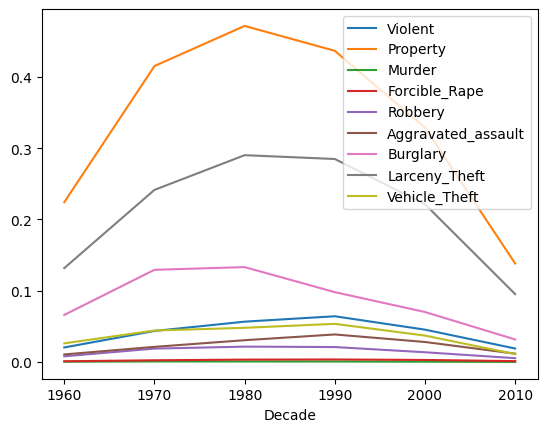

In [54]:
trends.plot()

In [ ]:
# solution 2
# crimes2.idxmax(0)

Population           2010-01-01
Violent              1990-01-01
Property             1990-01-01
Murder               1990-01-01
Forcible_Rape        1990-01-01
Robbery              1990-01-01
Aggravated_assault   1990-01-01
Burglary             1980-01-01
Larceny_Theft        1990-01-01
Vehicle_Theft        1990-01-01
dtype: datetime64[ns]